Importing the necessary libraries for the project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from tools import draw_rect_overlap, run_toys

print("Setup complete.")

Setup complete.


Let's create some dataset using *Monte Carlo toys*. 

We will generate $N=10^5$ events, that are pairs of $(A,B)$ where $A\in\{0,1\}$ or $B\in\{0,1\}$. 
The joint probability distribution is assumed to contain:

$$
P_{AB} = (p_{11},p_{10},p_{01},p_{00})
$$

Thus the "*truth*" efficiencies are:

$$\hat e_{A} = 0.60+0.20= 0.80 ~~, \hat e_{B} = 0.60 + 0.15 = 0.75$$



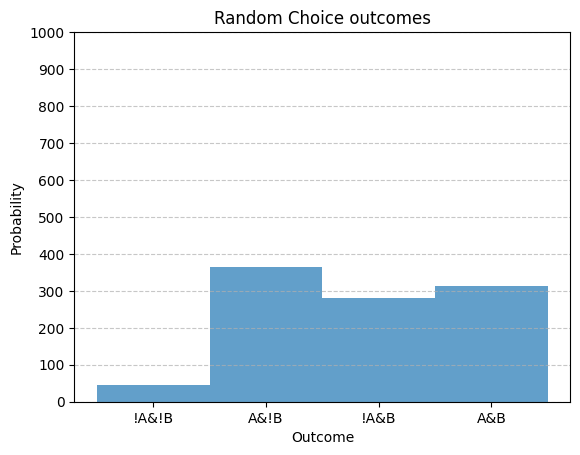

Simulation complete.
Outcomes distribution:
Eff(A) = 0.676
Eff(B) = 0.592


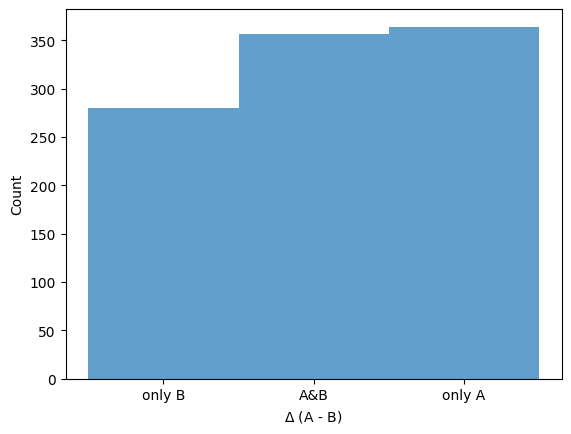

In [2]:
N = 1000

outcomes = ["A&B", "A&!B", "!A&B", "!A&!B"]
p11, p10, p01, p00 = 0.3, 0.4, 0.25, 0.05 
probabilities = [p11, p10, p01, p00]

seed = 1234554343256563643647325287976576352321
rnd_gen = np.random.default_rng(seed)

x = rnd_gen.choice(outcomes, size=N, p=probabilities)
plt.hist(x, bins=np.arange(5)-0.5, range=(0,4),  histtype='stepfilled', alpha=0.7)
plt.xlabel('Outcome')  
plt.ylabel('Probability')
plt.yticks(np.arange(0, N+1, step=100))
plt.grid(True, axis='y', which='major', linestyle='--', alpha=0.7)
plt.title('Random Choice outcomes') 
plt.show()

sample_A = (x == 'A&B') | (x == 'A&!B')
sample_B = (x == 'A&B') | (x == '!A&B')
sample_Delta = sample_A.astype(int) - sample_B.astype(int)

print("Simulation complete.")
print("Outcomes distribution:")
print(f"Eff(A) = {np.sum(sample_A) / N:.3f}")
print(f"Eff(B) = {np.sum(sample_B) / N:.3f}")
plt.hist(sample_Delta, bins=3, range=(-1,2), histtype='stepfilled', alpha=0.7)
plt.xticks([-0.5, 0.5, 1.5], ['only B', 'A&B', 'only A'])
plt.xlabel(fr'$\Delta$ (A - B)')
plt.ylabel('Count')
plt.show()

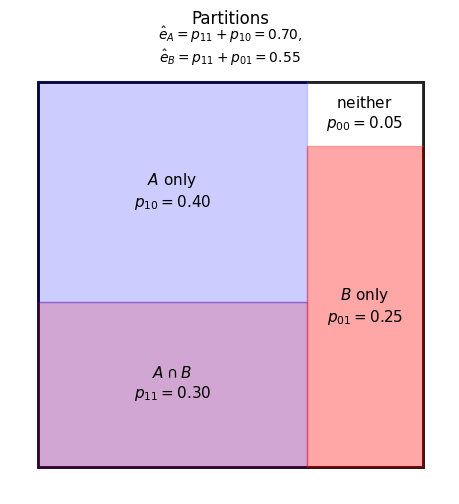

In [3]:
draw_rect_overlap(l=7, p11=p11, p10=p10, p01=p01, p00=p00,
                  title="Partitions")

The above set the concept. We will slightly change the code, performing the same task of sampling A,B events but after moving in a "Multinomial" formalism. This can improve the speed and efficiency of our code.

$$\{n_i\} \sim Multinomial ( N_{{events}} ; \{p_i\} ) , ~~ \{p_{i}\}\in R^4 $$

At each toy, we will assuming the efficiences $\hat e_{A},~\hat e_{B}$ to be independent Binomial variables:

$$\hat e_{A} \sim Binomial (N_{{events}}; e_{A})~~,~~\hat e_{B} \sim Binomial (N_{{events}}; e_{B})$$

To construct a "naive" Variance of the difference:

$$\sigma_{{Naive}}^2 = \dfrac{ e_{A} (1- e_{A})}{N_{{events}}}+\dfrac{ e_{B} (1-  e_{B})}{N_{{events}}} $$

And a "correct" Variance:

$$\sigma_{{Correct}}^2 = \dfrac{n_{10}+n_{01}}{N_{{events}}^2}$$

And we will compare.


In [13]:

Nevents = 1000000
Ntoys = 10000000

deltas, sigma_corrs, sigma_naives, eff_A_array, eff_B_array = run_toys(
    Nevents, 
    Ntoys, 
    probabilities, 
    rnd_gen)
 
print("Toys complete. No. of toys:", Ntoys)



Toys complete. No. of toys: 10000000


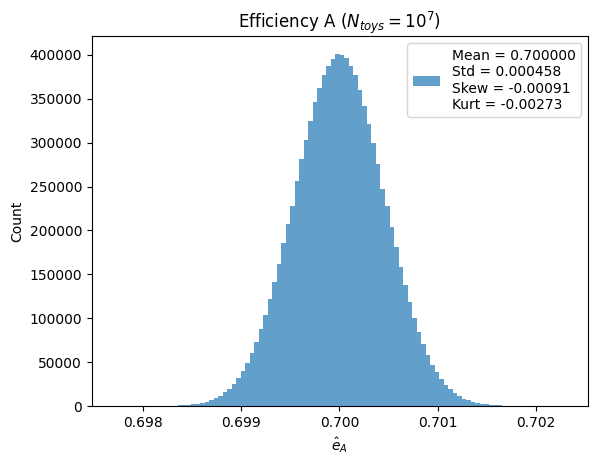

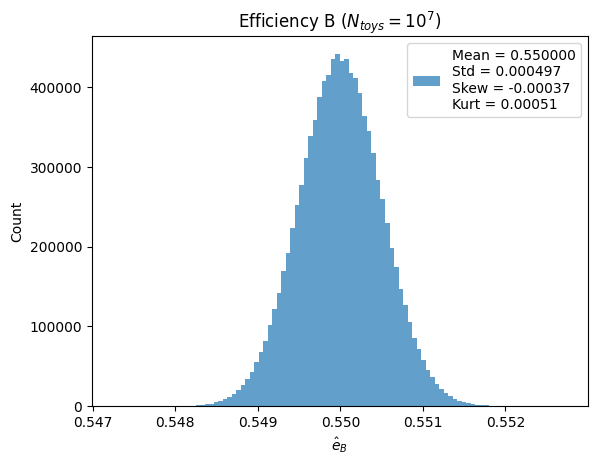

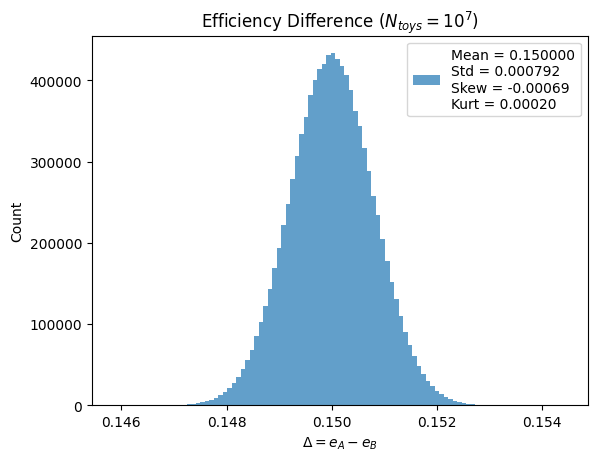

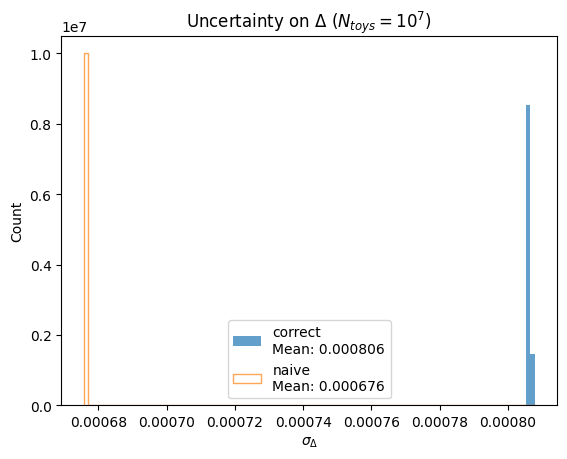

Toy simulations complete.
Mean Delta: 0.150000 ± 0.000792
Mean sigma_corr: 0.000806
Mean sigma_naive: 0.000676


In [19]:

resA , resB , resD, resSigCor, resSigNai = stats.describe(eff_A_array),stats.describe(eff_B_array), stats.describe(deltas), stats.describe(sigma_corrs), stats.describe(sigma_naives)   
label_A = (
    rf"Mean = {resA.mean:.6f}" "\n"
    rf"Std = {np.sqrt(resA.variance):.6f}" "\n"
    rf"Skew = {resA.skewness:.5f}" "\n"
    rf"Kurt = {resA.kurtosis:.5f}"
)

label_B = (
    rf"Mean = {resB.mean:.6f}" "\n"
    rf"Std = {np.sqrt(resB.variance):.6f}" "\n"
    rf"Skew = {resB.skewness:.5f}" "\n"
    rf"Kurt = {resB.kurtosis:.5f}"
)
label_D = (
    rf"Mean = {resD.mean:.6f}" "\n"
    rf"Std = {np.sqrt(resD.variance):.6f}" "\n"
    rf"Skew = {resD.skewness:.5f}" "\n"
    rf"Kurt = {resD.kurtosis:.5f}"
)


plt.hist(eff_A_array, bins=100, histtype='stepfilled', alpha=0.7, label=label_A)
plt.xlabel(r'$\hat{{e}}_A$ ')
plt.ylabel('Count')
plt.legend()
plt.title(rf'Efficiency A ($N_{{toys}}=10^{np.log10(Ntoys):.0f}$)')
plt.savefig('figures/effA_hist.png',format='png', dpi=150)
plt.show()

plt.hist(eff_B_array, bins=100, histtype='stepfilled', alpha=0.7, label=label_B)
plt.xlabel(r'$\hat{{e}}_B$ ')
plt.ylabel('Count')
plt.legend()
plt.title(rf'Efficiency B ($N_{{toys}}=10^{np.log10(Ntoys):.0f}$)')
plt.savefig('figures/effB_hist.png',format='png', dpi=150)
plt.show()

plt.hist(deltas, bins=100, histtype='stepfilled', alpha=0.7, label=label_D)
plt.xlabel(r'$\Delta = e_A - e_B$ ')
plt.ylabel('Count')
plt.legend()
plt.title(rf'Efficiency Difference ($N_{{toys}}=10^{np.log10(Ntoys):.0f}$)')
plt.savefig('figures/delta_hist.png',format='png', dpi=150)
plt.show()

min_val = min(np.min(sigma_corrs), np.min(sigma_naives))
max_val = max(np.max(sigma_corrs), np.max(sigma_naives))
# create 100 bins (101 edges) shared between both histograms
bins = np.linspace(min_val, max_val, 101)

 
plt.hist(sigma_corrs, bins=bins, label=f'correct\nMean: {resSigCor.mean:.6f}', histtype='stepfilled', alpha=0.7)
plt.hist(sigma_naives, bins=bins, label=f'naive\nMean: {resSigNai.mean:.6f}', histtype='step', alpha=0.7)
plt.xlabel(r'$\sigma_{\Delta}$')
plt.ylabel('Count')
plt.legend()
plt.title(rf'Uncertainty on $\Delta$ ($N_{{toys}}=10^{np.log10(Ntoys):.0f}$)')
plt.savefig('figures/sigma_hist.png',format='png', dpi=150)
plt.show()

print("Toy simulations complete.")
print(f"Mean Delta: {resD.mean:.6f} ± {np.sqrt(resD.variance):.6f}")
print(f"Mean sigma_corr: {resSigCor.mean:.6f}")
print(f"Mean sigma_naive: {resSigNai.mean:.6f}")

Finally produce pull plots to show better the deviation. We have for $e_{A} = p_{11} + p_{10}$ and $e_{B}=p_{11}+p_{01}$ :

$$
\Delta^{true} = e_{A} - e_{B} = p_{10} - p_{01} 
$$

and we define the pull:

$$
pull(Corr) = (\Delta_i - \Delta^{true}) /  \sigma_{corr,i}
$$


$$
pull(Naive) = (\Delta_i - \Delta^{true}) /  \sigma_{naive,i}
$$




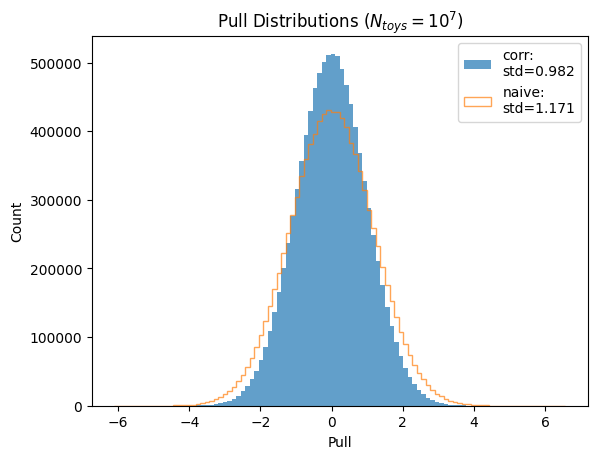

Pull distributions plotted.
Pull_corr: mean=0.000212, std=0.982291
Pull_naive: mean=0.000450, std=1.170852


In [20]:
pull_corr  = (deltas - (probabilities[1] - probabilities[2])) / sigma_corrs
pull_naive = (deltas - (probabilities[1] - probabilities[2])) / sigma_naives

min_val = min(np.min(pull_corr), np.min(pull_naive))
max_val = max(np.max(pull_corr), np.max(pull_naive))
# create 100 bins (101 edges) shared between both histograms
bins = np.linspace(min_val, max_val, 101)

plt.hist(pull_corr, bins=bins, label=f'corr:\nstd={np.std(pull_corr):.3f}', histtype='stepfilled', alpha=0.7)
plt.hist(pull_naive, bins=bins, label=f'naive:\nstd={np.std(pull_naive):.3f}', histtype='step', alpha=0.7)
plt.xlabel('Pull')
plt.ylabel('Count')
plt.title(rf'Pull Distributions ($N_{{toys}}=10^{np.log10(Ntoys):.0f}$)')
plt.legend()
plt.show()

print("Pull distributions plotted.")
print(f"Pull_corr: mean={np.mean(pull_corr):.6f}, std={np.std(pull_corr):.6f}")
print(f"Pull_naive: mean={np.mean(pull_naive):.6f}, std={np.std(pull_naive):.6f}") 

Also it is interesting to check when the naive method and the method that takes into account the correlations coincide. These cases are coincidental, meaning that the naive method is correct. However if someone chose values of probabilities close to them, they might wrongly reach the result that the two methods are identical. 

2.681750955026499e-06


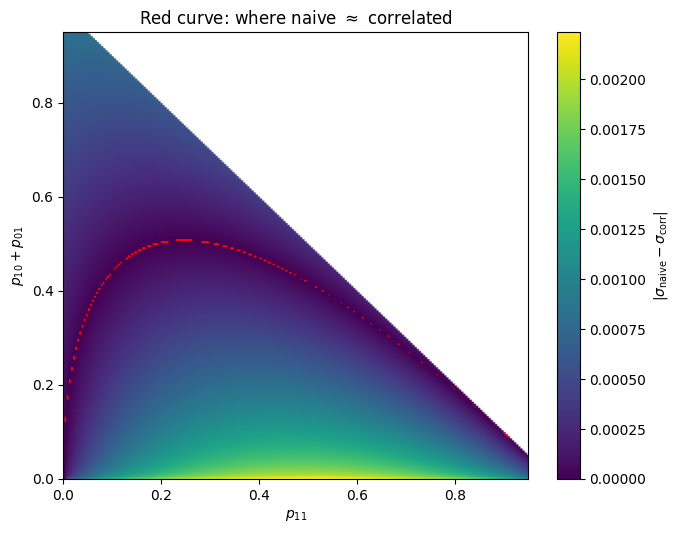

In [17]:

Nevents = 100000

# baseline disagreement split ratio
p10_base, p01_base = 0.4, 0.25
r = p10_base / (p10_base + p01_base)

# grid
p11_vals = np.linspace(0.0, 0.95, 220)   # will be masked where invalid
s_vals   = np.linspace(0.0, 0.95, 220)   # s = p10 + p01

P11, S = np.meshgrid(p11_vals, s_vals)

P10 = r * S
P01 = (1 - r) * S
P00 = 1.0 - P11 - S

# valid region: all probs >= 0
valid = (P00 >= 0) & (P10 >= 0) & (P01 >= 0) & (P11 >= 0)

# efficiencies
eA = P11 + P10
eB = P11 + P01

# exact correlated variance for Delta
d = P10 - P01
var_corr = (S - d**2) / Nevents  # Var(Delta)

# numerical safety
valid &= (var_corr >= 0) & (eA >= 0) & (eA <= 1) & (eB >= 0) & (eB <= 1)

sigma_corr  = np.full_like(P11, np.nan, dtype=float)
sigma_naive = np.full_like(P11, np.nan, dtype=float)

sigma_corr[valid] = np.sqrt(var_corr[valid])
sigma_naive[valid] = np.sqrt(eA[valid] * (1 - eA[valid]) / Nevents +
                             eB[valid] * (1 - eB[valid]) / Nevents)

# distance metric: relative difference
rel = np.abs(sigma_naive - sigma_corr)# / sigma_corr  # >0 naive bigger, <0 naive smaller

#0.000003
MIN = (np.nanmin(rel[rel>0]))*300
print(MIN)
# optional: contour where they match
plt.figure(figsize=(7.5, 5.8))
plt.contour(P11, S, rel, levels=[MIN], colors='r', linewidths=1.0)
plt.imshow(rel, origin='lower', aspect='auto',
           extent=[p11_vals.min(), p11_vals.max(), s_vals.min(), s_vals.max()])
plt.colorbar(label=r'$|\sigma_{\mathrm{naive}}-\sigma_{\mathrm{corr}}|$')#/\sigma_{\mathrm{corr}}$')
plt.xlabel(r'$p_{11}$')
plt.ylabel(r'$p_{10}+p_{01}$')
plt.title(r'Red curve: where naive $\approx$ correlated')
plt.show()
